In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load data
launch_data = pd.read_csv('launch_data_with_class.csv')
launch_data['Date'] = pd.to_datetime(launch_data['Date'])

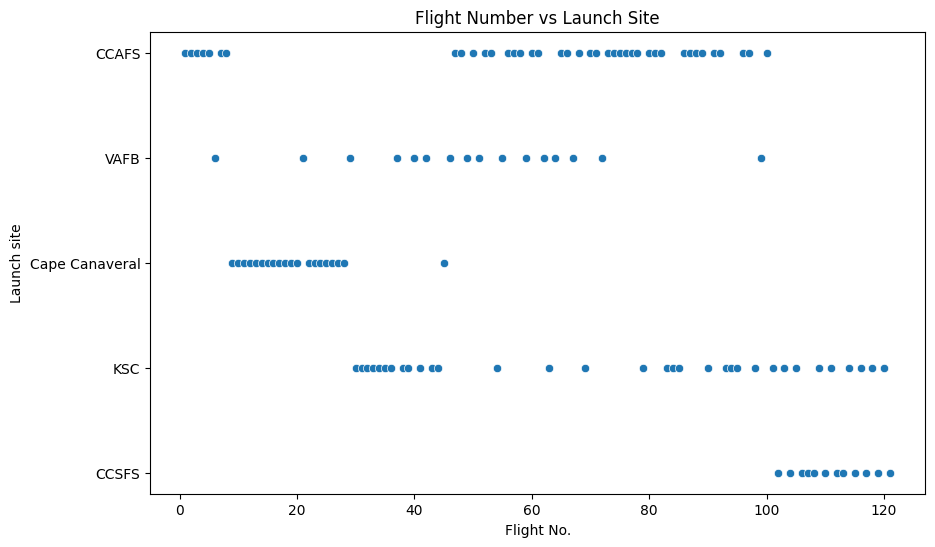

In [3]:
# Scatter plot of Flight Number vs. Launch Site
plt.figure(figsize=(10,6))
sns.scatterplot(data=launch_data, x='Flight No.', y='Launch site')
plt.title('Flight Number vs Launch Site')
plt.show()

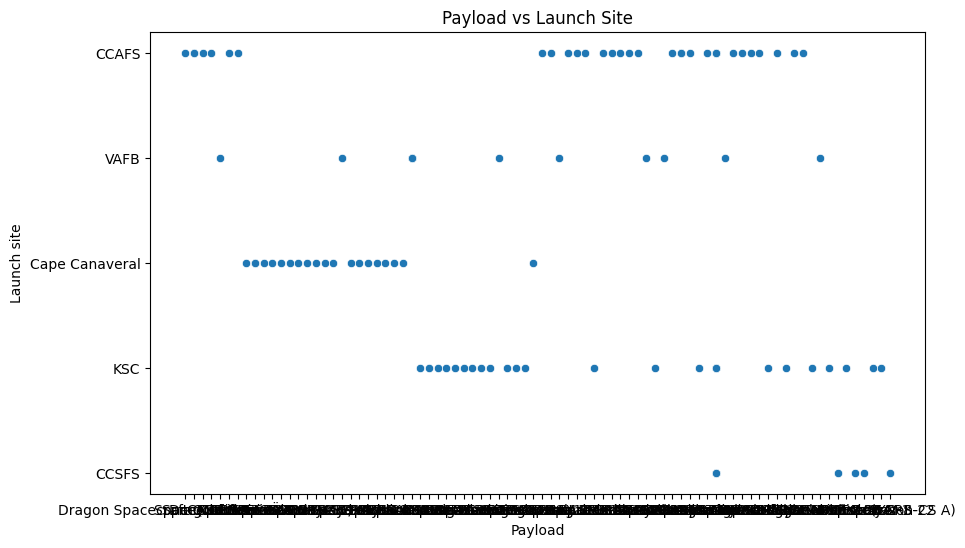

In [4]:
# Scatter plot of Payload vs. Launch Site
plt.figure(figsize=(10,6))
sns.scatterplot(data=launch_data, x='Payload', y='Launch site')
plt.title('Payload vs Launch Site')
plt.show()

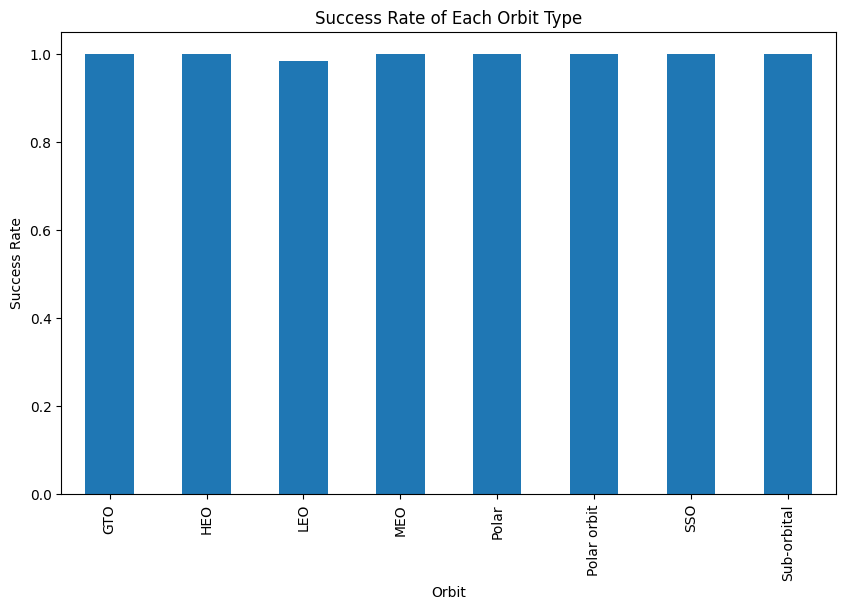

In [5]:
# Bar chart for the success rate of each orbit type
orbit_success = launch_data.groupby('Orbit')['Class'].mean()
orbit_success.plot(kind='bar', figsize=(10,6))
plt.title('Success Rate of Each Orbit Type')
plt.ylabel('Success Rate')
plt.show()

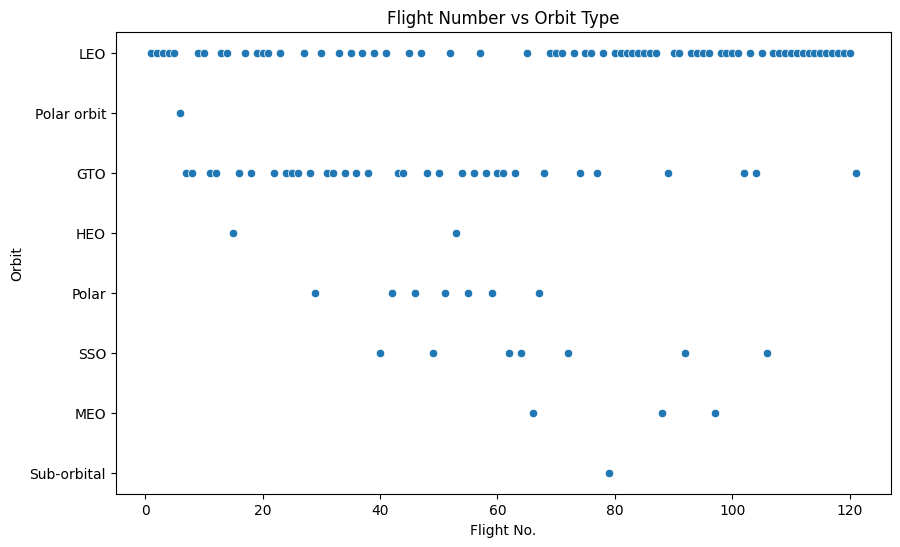

In [6]:
# Scatter point of Flight number vs. Orbit type
plt.figure(figsize=(10,6))
sns.scatterplot(data=launch_data, x='Flight No.', y='Orbit')
plt.title('Flight Number vs Orbit Type')
plt.show()

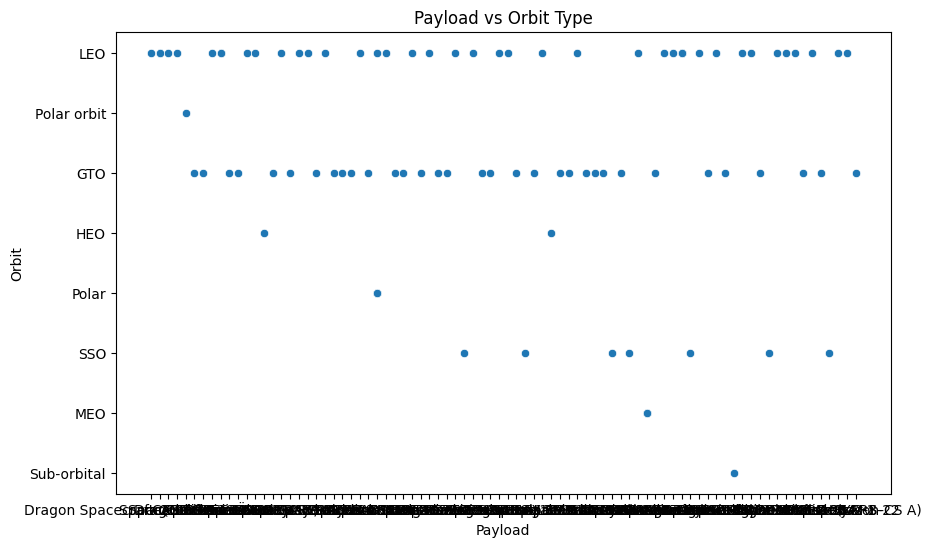

In [7]:
# Scatter point of payload vs. orbit type
plt.figure(figsize=(10,6))
sns.scatterplot(data=launch_data, x='Payload', y='Orbit')
plt.title('Payload vs Orbit Type')
plt.show()

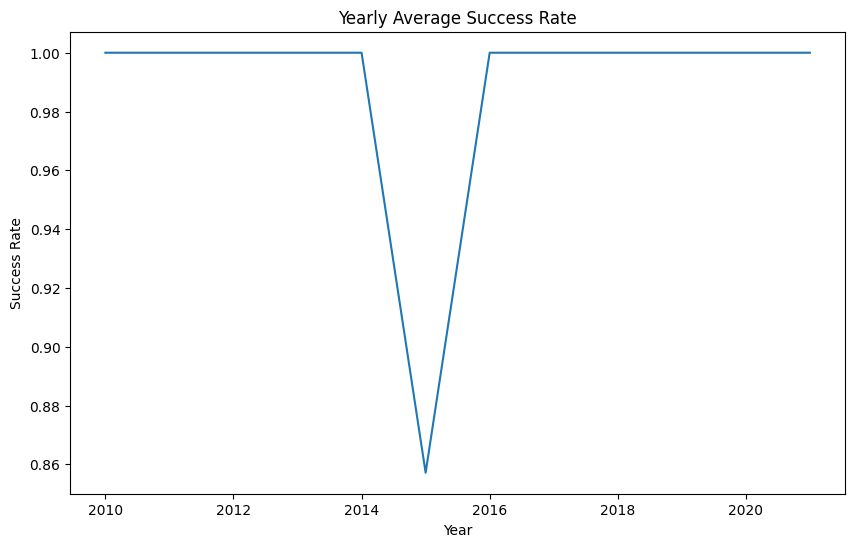

In [8]:
# Line chart of yearly average success rate
launch_data['Year'] = launch_data['Date'].dt.year
yearly_success = launch_data.groupby('Year')['Class'].mean()
yearly_success.plot(kind='line', figsize=(10,6))
plt.title('Yearly Average Success Rate')
plt.ylabel('Success Rate')
plt.show()


In [9]:
# Find the names of the unique launch sites
unique_launch_sites = launch_data['Launch site'].unique()
print("Unique Launch Sites:", unique_launch_sites)

Unique Launch Sites: ['CCAFS' 'VAFB' 'Cape Canaveral' 'KSC' 'CCSFS']


In [10]:
# Find 5 records where launch sites begin with `CCA`
cca_records = launch_data[launch_data['Launch site'].str.startswith('CCA')].head(5)
print("First 5 records where launch sites begin with 'CCA':")
print(cca_records)

First 5 records where launch sites begin with 'CCA':
   Flight No. Launch site                               Payload Payload mass  \
0           1       CCAFS  Dragon Spacecraft Qualification Unit            0   
1           2       CCAFS                                Dragon            0   
2           3       CCAFS                                Dragon       525 kg   
3           4       CCAFS                          SpaceX CRS-1     4,700 kg   
4           5       CCAFS                          SpaceX CRS-2     4,877 kg   

  Orbit Customer Launch outcome Version Booster Booster landing       Date  \
0   LEO   SpaceX      Success\n  F9 v1.0B0003.1         Failure 2010-06-04   
1   LEO     NASA        Success  F9 v1.0B0004.1         Failure 2010-12-08   
2   LEO     NASA        Success  F9 v1.0B0005.1    No attempt\n 2012-05-22   
3   LEO     NASA      Success\n  F9 v1.0B0006.1      No attempt 2012-10-08   
4   LEO     NASA      Success\n  F9 v1.0B0007.1    No attempt\n 2013-03-01  

In [11]:
# Find the dates of the first successful landing outcome on ground pad
first_success_dates = launch_data[(launch_data['Class'] == 1) & (launch_data['Booster landing'] == 'Success')]['Date'].min()
print("The date of the first successful landing outcome on ground pad:", first_success_dates)

The date of the first successful landing outcome on ground pad: 2015-12-22 00:00:00


Names of boosters which have successfully landed on drone ship and had payload mass greater than 4000 but less than 6000

In [14]:
# Remove 'kg' and ',' from 'Payload mass', replace it with nothing
launch_data['Payload mass'] = launch_data['Payload mass'].str.replace('kg', '').str.replace(',', '')

# Convert 'Payload mass' to numeric format, errors='coerce' will replace non-numeric values with NaN
launch_data['Payload mass'] = pd.to_numeric(launch_data['Payload mass'], errors='coerce')

# Now run your selection criteria
boosters = launch_data[(launch_data['Booster landing'] == 'drone ship') &
                       (launch_data['Class'] == 1) &
                       (4000 < launch_data['Payload mass']) &
                       (launch_data['Payload mass'] < 6000)]['Version Booster']
print(boosters)

Series([], Name: Version Booster, dtype: object)


In [15]:
# Make sure your payload mass column is converted to numeric
boosters = launch_data[(launch_data['Booster landing'] == 'drone ship') &
                       (launch_data['Class'] == 1) &
                       (4000 < launch_data['Payload mass']) &
                       (launch_data['Payload mass'] < 6000)]['Version Booster']
print(boosters)

Series([], Name: Version Booster, dtype: object)


Calculate the total number of successful and failure mission outcomes

In [16]:
mission_outcomes = launch_data['Class'].value_counts()
print(mission_outcomes)

1    120
0      1
Name: Class, dtype: int64


List the names of the booster which have carried the maximum payload mass

In [20]:
max_payload = launch_data['Payload mass'].max()
boosters_max_payload = launch_data[launch_data['Payload mass'] == max_payload]['Version Booster']
print(boosters_max_payload)

74             F9 B5
77             F9 B5
79             F9 B5
80             F9 B5
82             F9 B5
83             F9 B5
85             F9 B5
92      F9 B5B1060.2
93      F9 B5B1058.3
94      F9 B5B1051.6
95             F9 B5
99           F9 B5 ♺
104     F9 B5B1051.8
106          F9 B5 ♺
107          F9 B5 ♺
108          F9 B5 ♺
109          F9 B5 ♺
110          F9 B5 ♺
111     F9 B5B1060.6
112          F9 B5 ♺
114     F9 B5B1060.7
115     F9 B5B1049.9
116    F9 B5B1051.10
118     F9 B5B1063.2
Name: Version Booster, dtype: object


List the failed landing_outcomes in drone ship, their booster versions, and launch site names for in year 2015

In [22]:
failed_landings_2015 = launch_data[(launch_data['Booster landing'] == 'drone ship') &
                                   (launch_data['Class'] == 0) &
                                   (pd.to_datetime(launch_data['Date']).dt.year == 2015)][['Version Booster', 'Launch site']]
print(failed_landings_2015)

Empty DataFrame
Columns: [Version Booster, Launch site]
Index: []


Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order

In [19]:
landing_outcomes_rank = launch_data[(pd.to_datetime(launch_data['Date']) >= '2010-06-04') &
                                    (pd.to_datetime(launch_data['Date']) <= '2017-03-20')]['Booster landing'].value_counts()
print(landing_outcomes_rank)

Success         8
No attempt      7
Failure         6
No attempt\n    3
Controlled      3
Uncontrolled    2
Failure         1
Precluded       1
Name: Booster landing, dtype: int64
